In [2]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


In [3]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [4]:
batch_size = 128
num_classes = 10
epochs = 10

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [5]:
hist = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
print("The model has successfully trained")

model.save('mnist.h5')
print("Saving the model as mnist.h5")

Epoch 1/10
469/469 [==============================] - 120s 251ms/step - loss: 0.1841 - accuracy: 0.9431 - val_loss: 0.0474 - val_accuracy: 0.9850
Epoch 2/10
469/469 [==============================] - 139s 296ms/step - loss: 0.0625 - accuracy: 0.9810 - val_loss: 0.0335 - val_accuracy: 0.9894
Epoch 3/10
469/469 [==============================] - 136s 290ms/step - loss: 0.0470 - accuracy: 0.9850 - val_loss: 0.0253 - val_accuracy: 0.9918
Epoch 4/10
469/469 [==============================] - 130s 278ms/step - loss: 0.0357 - accuracy: 0.9888 - val_loss: 0.0252 - val_accuracy: 0.9920
Epoch 5/10
469/469 [==============================] - 147s 314ms/step - loss: 0.0313 - accuracy: 0.9896 - val_loss: 0.0246 - val_accuracy: 0.9920
Epoch 6/10
469/469 [==============================] - 153s 325ms/step - loss: 0.0254 - accuracy: 0.9916 - val_loss: 0.0292 - val_accuracy: 0.9903
Epoch 7/10
469/469 [==============================] - 122s 261ms/step - loss: 0.0232 - accuracy: 0.9924 - val_loss: 0.0281 -

In [6]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.029481351375579834
Test accuracy: 0.991599977016449


In [11]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import regularizers

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Preprocess the data
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

# Define the model architecture
model = keras.Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer=RMSprop(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Define the data augmentation generator
datagen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, height_shift_range=0.1, zoom_range=0.1)

# Define the early stopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=3)

# Train the model with data augmentation and early stopping
model.fit(datagen.flow(x_train, y_train, batch_size=32), epochs=2, validation_data=(x_test, y_test), callbacks=[early_stop])

# Evaluate the model on the test set
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

model.save('mnist6.h5')


Epoch 1/2
1875/1875 [==============================] - 44s 23ms/step - loss: 0.6406 - accuracy: 0.8489 - val_loss: 0.1507 - val_accuracy: 0.9707
Epoch 2/2
1875/1875 [==============================] - 49s 26ms/step - loss: 0.2446 - accuracy: 0.9432 - val_loss: 0.1361 - val_accuracy: 0.9721
Test loss: 0.13613124191761017
Test accuracy: 0.972100019454956


In [3]:
from keras.models import load_model
from tkinter import *
import tkinter as tk
import win32gui
from PIL import ImageGrab, Image
import numpy as np

model = load_model('mnist6.h5')

def predict_digit(img):
    #resize image to 28x28 pixels
    img = img.resize((28,28))
    #convert rgb to grayscale
    img = img.convert('L')
    img = np.array(img)
    #reshaping to support our model input and normalizing
    img = img.reshape(1,28,28,1)
    img = img/255.0
    #predicting the class
    res = model.predict([img])[0]
    return np.argmax(res), max(res)

class App(tk.Tk):
    def __init__(self):
        tk.Tk.__init__(self)

        self.x = self.y = 0

        # Creating elements
        self.canvas = tk.Canvas(self, width=300, height=300, bg = "white", cursor="cross")
        self.label = tk.Label(self, text="Thinking..", font=("Helvetica", 48))
        self.classify_btn = tk.Button(self, text = "Recognise", command =         self.classify_handwriting) 
        self.button_clear = tk.Button(self, text = "Clear", command = self.clear_all)

        # Grid structure
        self.canvas.grid(row=0, column=0, pady=2, sticky=W, )
        self.label.grid(row=0, column=1,pady=2, padx=2)
        self.classify_btn.grid(row=1, column=1, pady=2, padx=2)
        self.button_clear.grid(row=1, column=0, pady=2)

        #self.canvas.bind("<Motion>", self.start_pos)
        self.canvas.bind("<B1-Motion>", self.draw_lines)

    def clear_all(self):
        self.canvas.delete("all")

    def classify_handwriting(self):
        HWND = self.canvas.winfo_id() # get the handle of the canvas
        rect = win32gui.GetWindowRect(HWND) # get the coordinate of the canvas
        im = ImageGrab.grab(rect)

        digit, acc = predict_digit(im)
        self.label.configure(text= str(digit)+', '+ str(int(acc*100))+'%')

    def draw_lines(self, event):
        self.x = event.x
        self.y = event.y
        r=8
        self.canvas.create_oval(self.x-r, self.y-r, self.x + r, self.y + r, fill='black')

app = App()
mainloop()

1/1 [==============================] - 0s 26ms/step


In [21]:
# Import necessary libraries
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.utils import to_categorical

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the pixel values between 0 and 1
x_train = x_train / 255.0
x_test = x_test / 255.0

# Convert the labels to one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Reshape the input data to 4D tensor (batch_size, height, width, channels)
x_train = np.expand_dims(x_train, axis=3)
x_test = np.expand_dims(x_test, axis=3)

# Define the CNN model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_test, y_test))

# Evaluate the model on test data
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
model.save('mnist2.h5')

Epoch 1/10
469/469 [==============================] - 27s 55ms/step - loss: 0.2058 - accuracy: 0.9399 - val_loss: 0.0623 - val_accuracy: 0.9810
Epoch 2/10
469/469 [==============================] - 27s 58ms/step - loss: 0.0577 - accuracy: 0.9819 - val_loss: 0.0382 - val_accuracy: 0.9875
Epoch 3/10
469/469 [==============================] - 37s 80ms/step - loss: 0.0410 - accuracy: 0.9869 - val_loss: 0.0396 - val_accuracy: 0.9857
Epoch 4/10
469/469 [==============================] - 30s 64ms/step - loss: 0.0312 - accuracy: 0.9901 - val_loss: 0.0344 - val_accuracy: 0.9880
Epoch 5/10
469/469 [==============================] - 28s 59ms/step - loss: 0.0242 - accuracy: 0.9925 - val_loss: 0.0343 - val_accuracy: 0.9886
Epoch 6/10
469/469 [==============================] - 30s 63ms/step - loss: 0.0195 - accuracy: 0.9939 - val_loss: 0.0328 - val_accuracy: 0.9898
Epoch 7/10
469/469 [==============================] - 31s 67ms/step - loss: 0.0158 - accuracy: 0.9950 - val_loss: 0.0286 - val_accuracy:

In [28]:
# Import necessary libraries
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the pixel values between 0 and 1
x_train = x_train / 255.0
x_test = x_test / 255.0

# Convert the labels to one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Reshape the input data to 4D tensor (batch_size, height, width, channels)
x_train = np.expand_dims(x_train, axis=3)
x_test = np.expand_dims(x_test, axis=3)

# Define the CNN model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_regularizer='l2'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
model.fit(x_train, y_train, batch_size=128, epochs=20, validation_data=(x_test, y_test), callbacks=[early_stop])

# Evaluate the model on test data
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
model.save('mnist3.h5')


Epoch 1/20
469/469 [==============================] - 35s 72ms/step - loss: 0.7646 - accuracy: 0.8773 - val_loss: 0.2325 - val_accuracy: 0.9717
Epoch 2/20
469/469 [==============================] - 43s 91ms/step - loss: 0.3006 - accuracy: 0.9493 - val_loss: 0.2042 - val_accuracy: 0.9779
Epoch 3/20
469/469 [==============================] - 41s 87ms/step - loss: 0.2744 - accuracy: 0.9566 - val_loss: 0.1881 - val_accuracy: 0.9818
Epoch 4/20
469/469 [==============================] - 42s 90ms/step - loss: 0.2614 - accuracy: 0.9606 - val_loss: 0.1875 - val_accuracy: 0.9830
Epoch 5/20
469/469 [==============================] - 42s 89ms/step - loss: 0.2533 - accuracy: 0.9627 - val_loss: 0.1708 - val_accuracy: 0.9852
Epoch 6/20
469/469 [==============================] - 51s 109ms/step - loss: 0.2416 - accuracy: 0.9652 - val_loss: 0.1745 - val_accuracy: 0.9848
Epoch 7/20
469/469 [==============================] - 50s 107ms/step - loss: 0.2394 - accuracy: 0.9658 - val_loss: 0.1739 - val_accurac

In [1]:
# Import necessary libraries
from tkinter import *
import tkinter as tk
from PIL import Image, ImageDraw
import numpy as np
from keras.models import load_model

# Load the trained model
model = load_model('mnist6.h5')

# Define the canvas size and brush size
canvas_width = 500
canvas_height = 500
brush_size = 10

# Define the function for drawing on canvas
def paint(event):
    x1, y1 = (event.x - brush_size), (event.y - brush_size)
    x2, y2 = (event.x + brush_size), (event.y + brush_size)
    canvas.create_oval(x1, y1, x2, y2, fill='black', outline='black')
    draw.line([x1, y1, x2, y2], fill='white', width=brush_size)

# Define the function for recognizing the digit
def recognize_digit():
    # Resize the image to 28x28 and convert it to grayscale
    img = Image.fromarray(np.array(canvas_img.resize((28, 28)).convert('L')))
    display(img)
    # Convert the image to a numpy array and normalize the pixel values
    img_array = np.array(img).reshape(1, 28, 28, 1) / 255
    # Make the prediction using the trained model
    pred_prob = model.predict(img_array)[0]
    pred_label = np.argmax(pred_prob)
    # Show the prediction result
    result_label.config(text='The drawn digit is: ' + str(pred_label) + ' with confidence: ' + str(pred_prob[pred_label]))

# Create the main window and canvas
root = Tk()
root.title('Digit Recognition')
canvas = Canvas(root, width=canvas_width, height=canvas_height, bg='white')
canvas.pack()

# Create the PIL image and draw object
canvas_img = Image.new('RGB', (canvas_width, canvas_height), 'white')
draw = ImageDraw.Draw(canvas_img)

# Bind the mouse events to the canvas for drawing
canvas.bind('<B1-Motion>', paint)

# Create the recognize button and result label
recognize_button = Button(root, text='Recognize', command=recognize_digit)
recognize_button.pack()
result_label = Label(root, text='')
result_label.pack()

# Run the main loop
root.mainloop()


In [92]:
best_model = load_model('mnist4.h5')

# Predict on a new image
img = np.array(Image.open('digit.png').convert('L')) / 255.0
img = img.reshape((1, 28, 28, 1))
pred = best_model.predict(img)[0]
pred_num = np.argmax(pred)

# Print the prediction
print(f'Prediction: {pred_num}')

1/1 [==============================] - 0s 69ms/step
Prediction: 8


In [8]:
import os
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

print("Welcome to the NeuralNine (c) Handwritten Digits Recognition v0.1")

# Decide if to load an existing model or to train a new one
train_new_model = True

if train_new_model:
    # Loading the MNIST data set with samples and splitting it
    mnist = tf.keras.datasets.mnist
    (X_train, y_train), (X_test, y_test) = mnist.load_data()

    # Normalizing the data (making length = 1)
    X_train = tf.keras.utils.normalize(X_train, axis=1)
    X_test = tf.keras.utils.normalize(X_test, axis=1)

    # Create a neural network model
    # Add one flattened input layer for the pixels
    # Add two dense hidden layers
    # Add one dense output layer for the 10 digits
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(units=128, activation=tf.nn.relu))
    model.add(tf.keras.layers.Dense(units=128, activation=tf.nn.relu))
    model.add(tf.keras.layers.Dense(units=10, activation=tf.nn.softmax))

    # Compiling and optimizing model
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Training the model
    model.fit(X_train, y_train, epochs=10)

    # Evaluating the model
    val_loss, val_acc = model.evaluate(X_test, y_test)
    print(val_loss)
    print(val_acc)

    # Saving the model
    model.save('handwritten_digits.model')
else:
    # Load the model
    model = tf.keras.models.load_model('handwritten_digits.model')
model.save('mnist6.h5')
# Load custom images and predict them


Welcome to the NeuralNine (c) Handwritten Digits Recognition v0.1
Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2626 - accuracy: 0.9233
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1070 - accuracy: 0.9674
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0742 - accuracy: 0.9770
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0555 - accuracy: 0.9820
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0441 - accuracy: 0.9854
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0338 - accuracy: 0.9890
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0276 - accuracy: 0.9904
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0207 - accuracy: 0.9930
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0181 - accuracy: 0.9940
Epoch 10/10
313/

INFO:tensorflow:Assets written to: handwritten_digits.model\assets


INFO:tensorflow:Assets written to: handwritten_digits.model\assets


In [ ]:
image_number = 1
while os.path.isfile('digits/digit{}.png'.format(image_number)):
    try:
        img = cv2.imread('digits/digit{}.png'.format(image_number))[:,:,0]
        img = np.invert(np.array([img]))
        prediction = model.predict(img)
        print("The number is probably a {}".format(np.argmax(prediction)))
        plt.imshow(img[0], cmap=plt.cm.binary)
        plt.show()
        image_number += 1
    except:
        print("Error reading image! Proceeding with next image...")
        image_number += 1

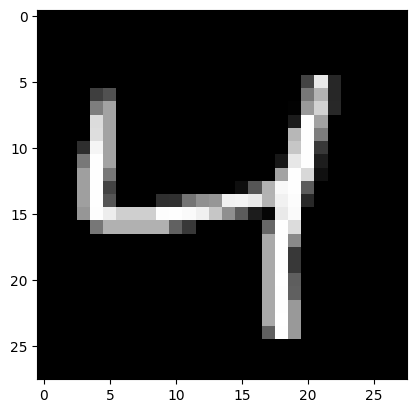

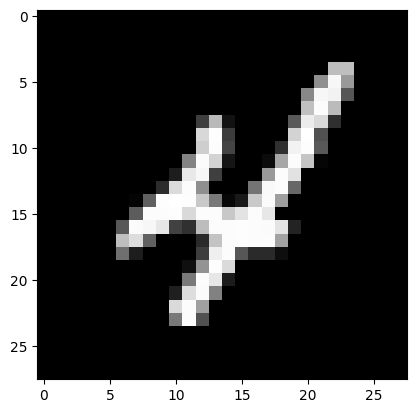

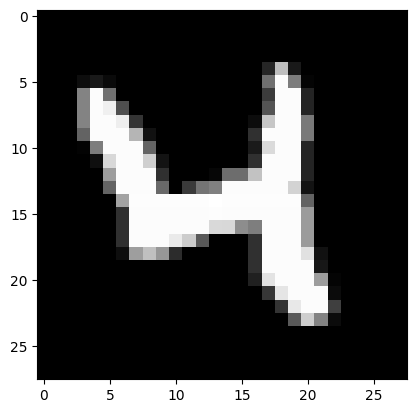

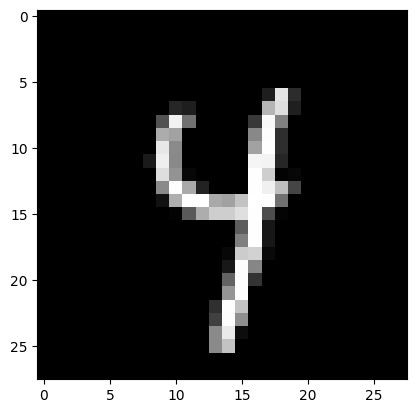

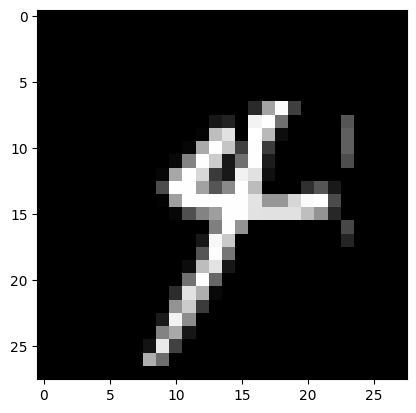

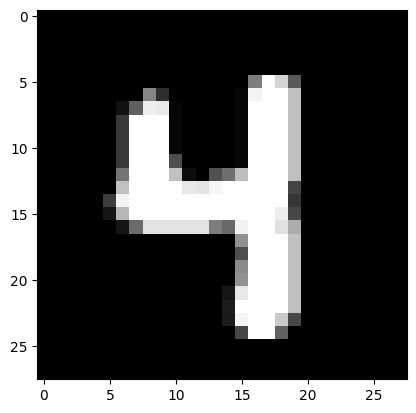

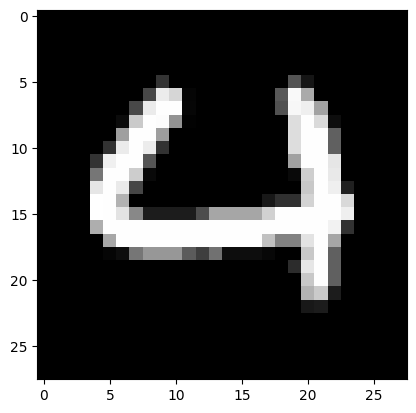

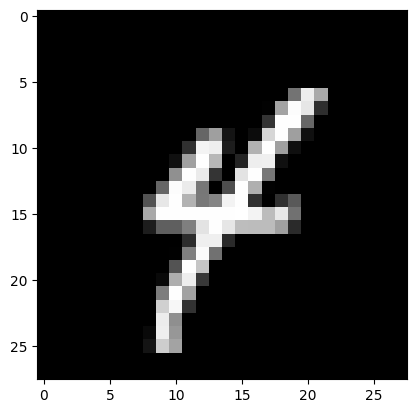

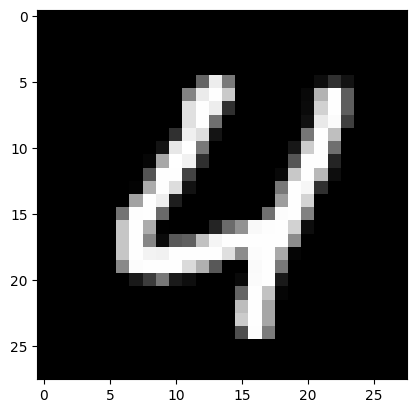

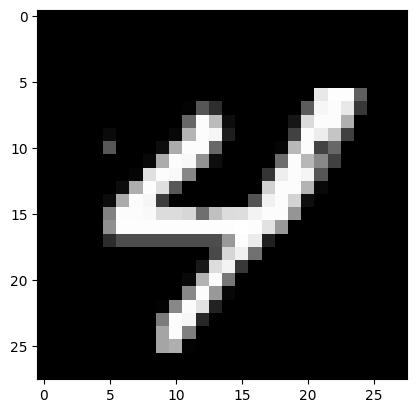

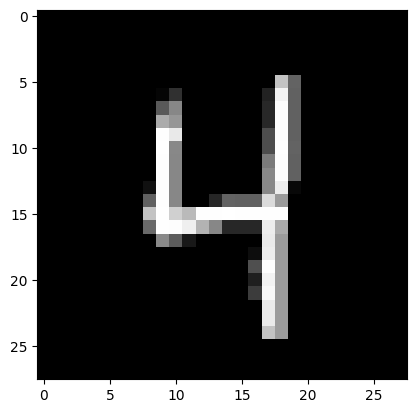

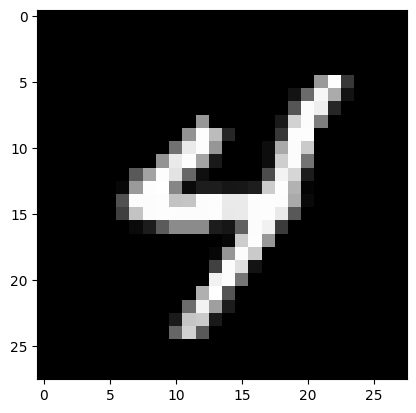

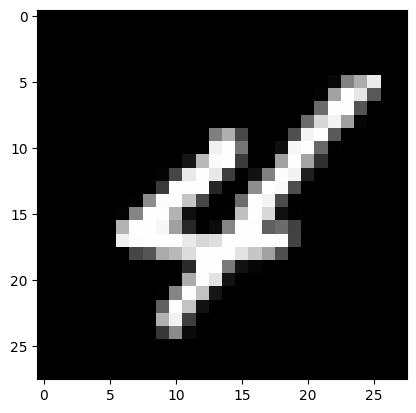

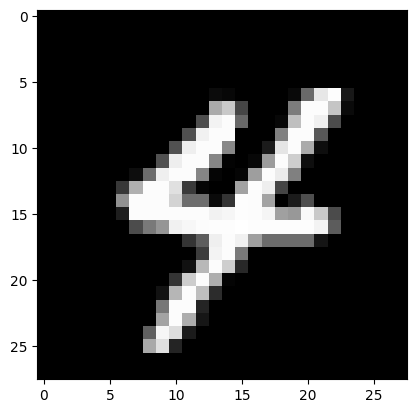

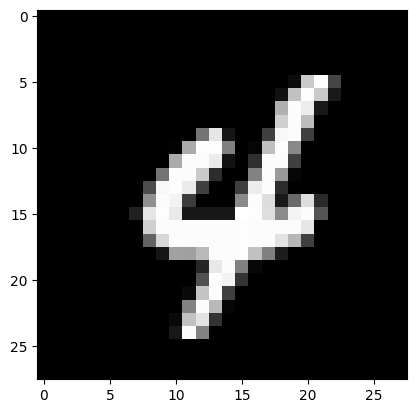

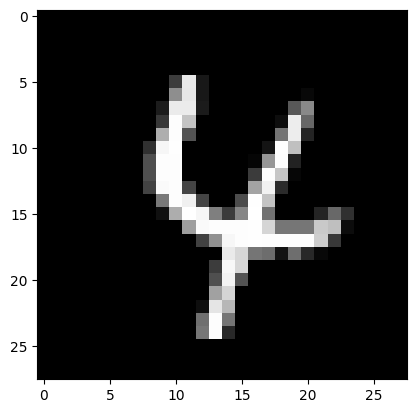

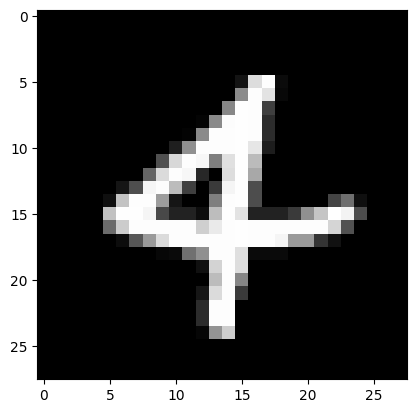

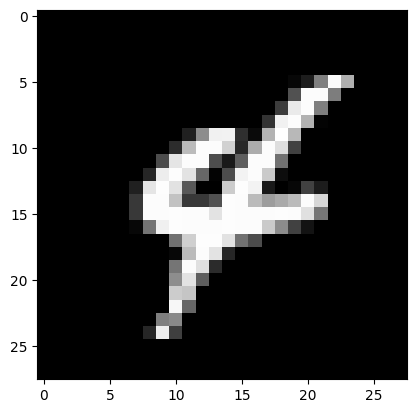

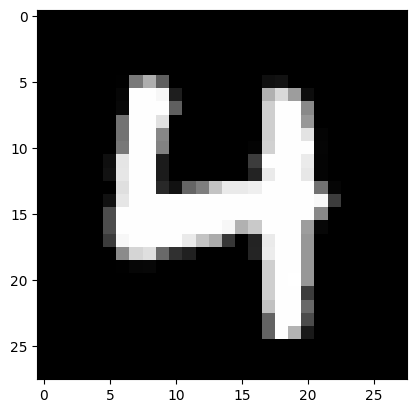

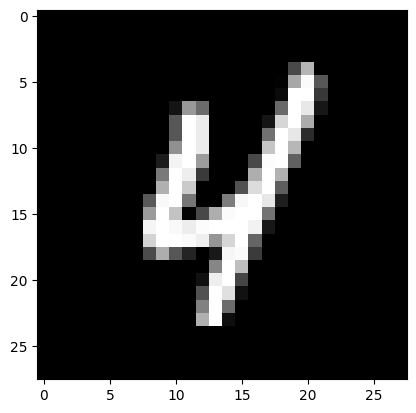

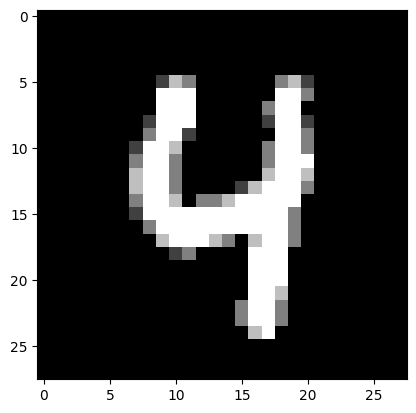

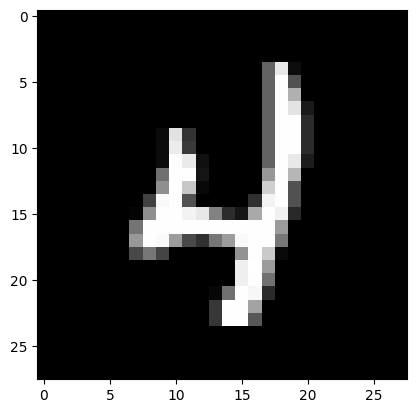

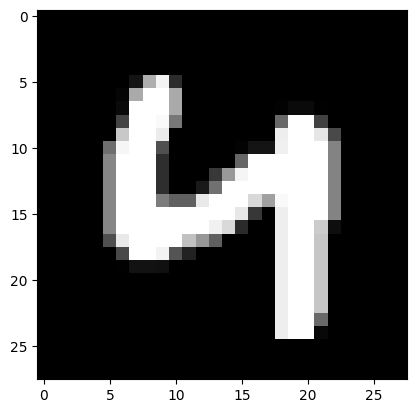

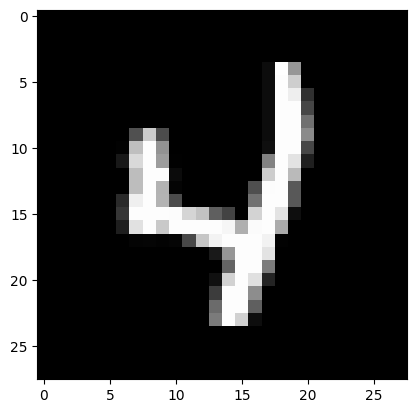

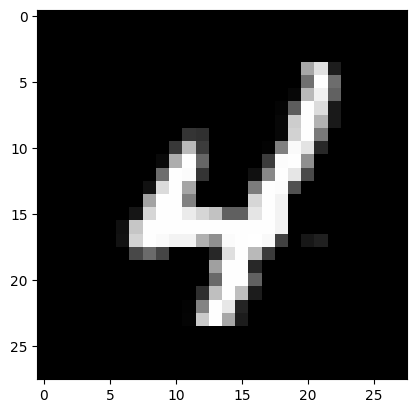

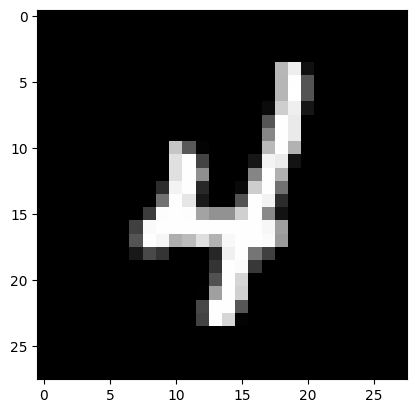

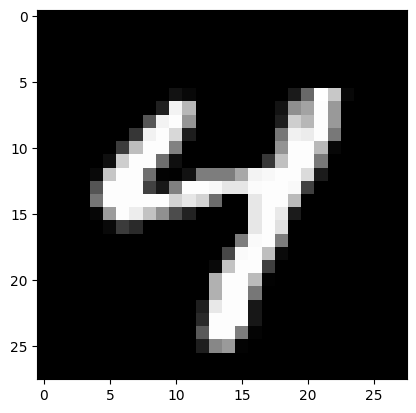

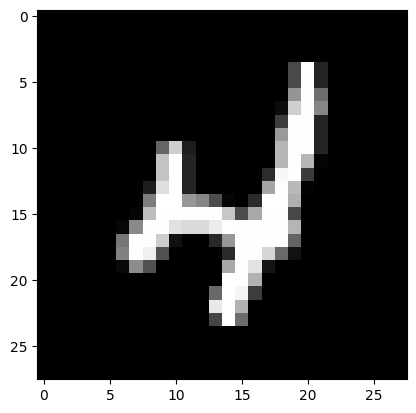

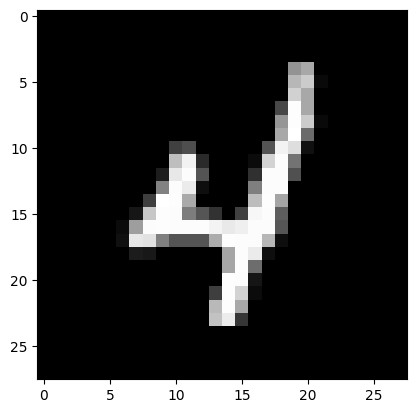

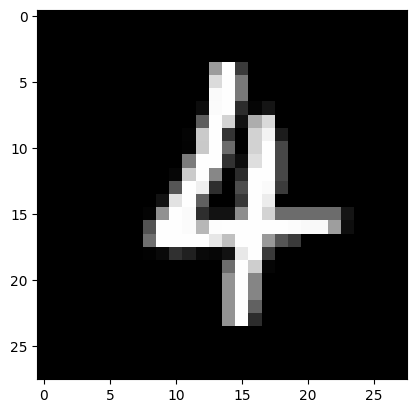

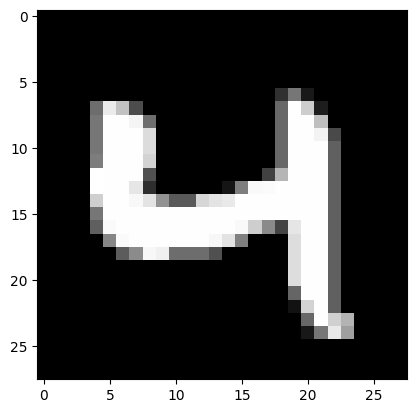

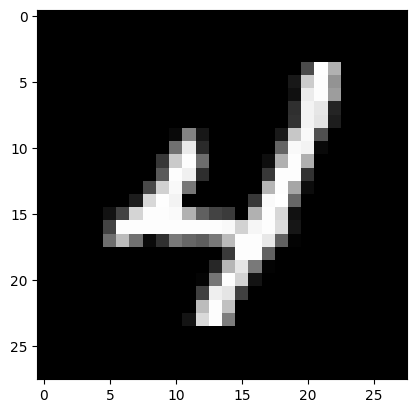

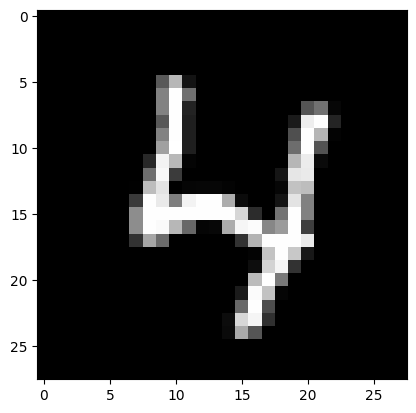

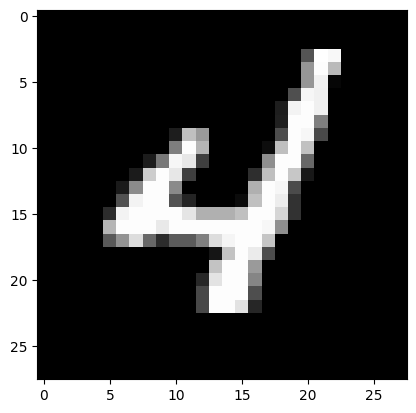

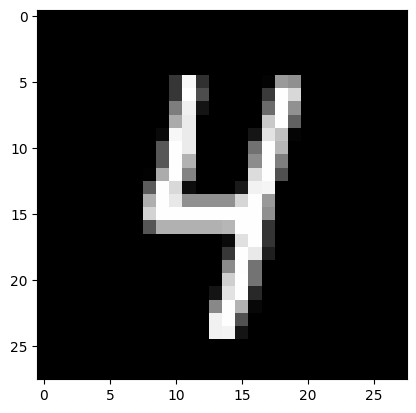

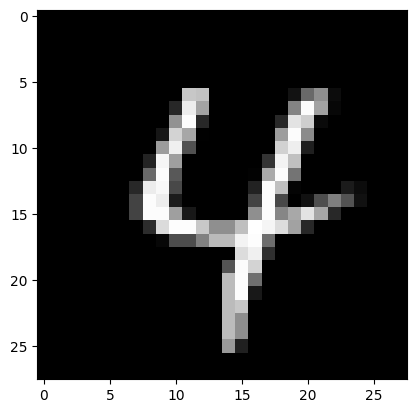

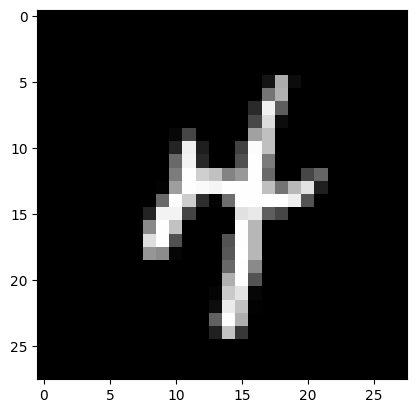

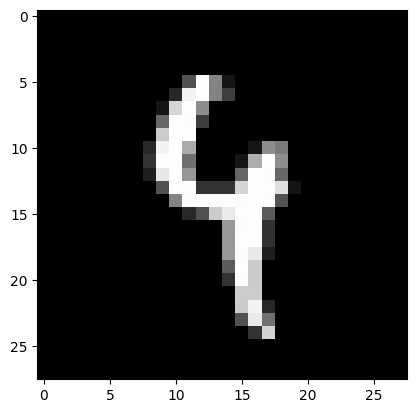

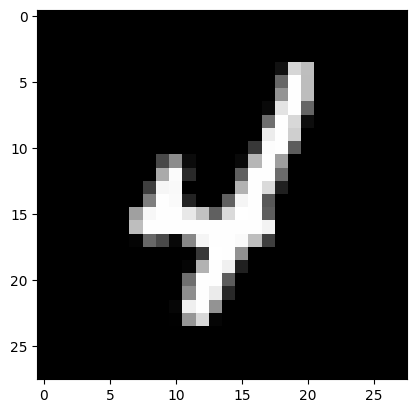

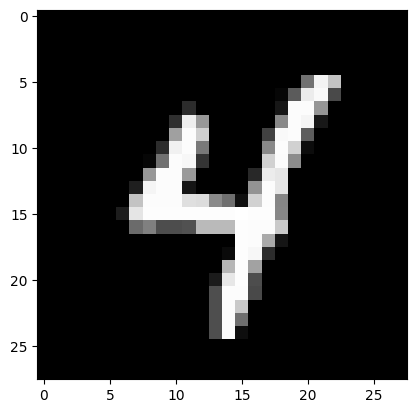

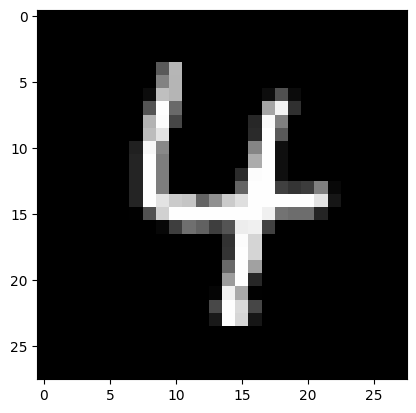

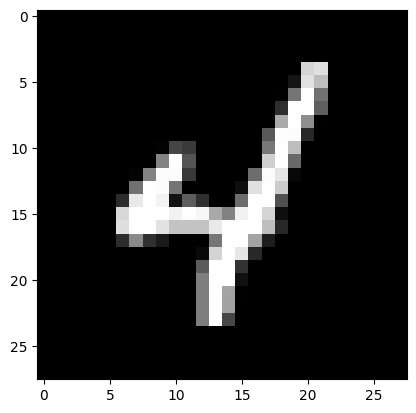

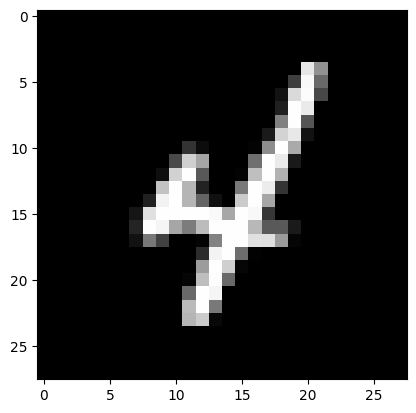

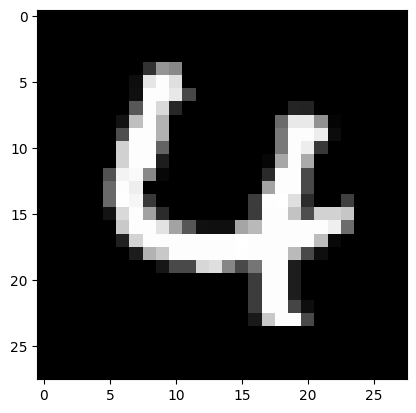

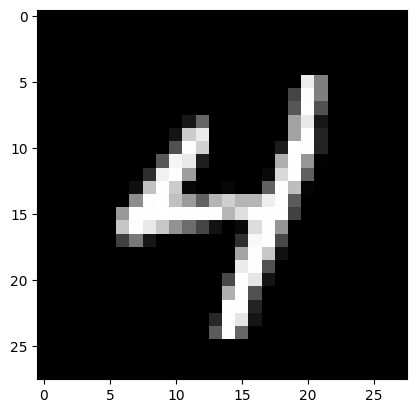

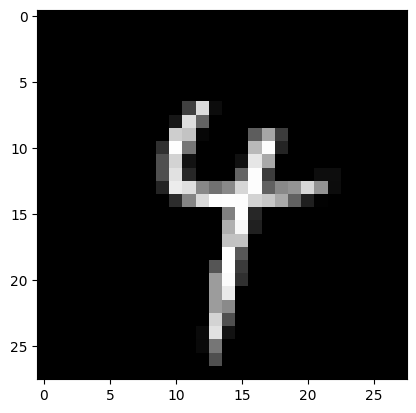

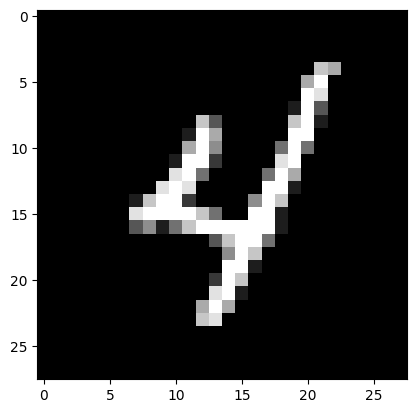

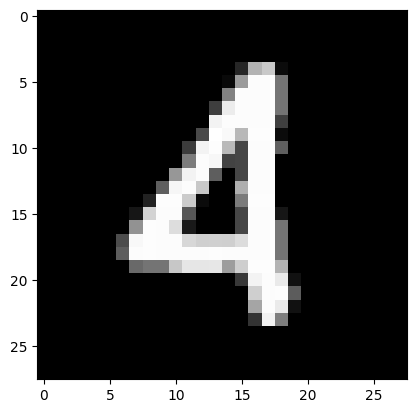

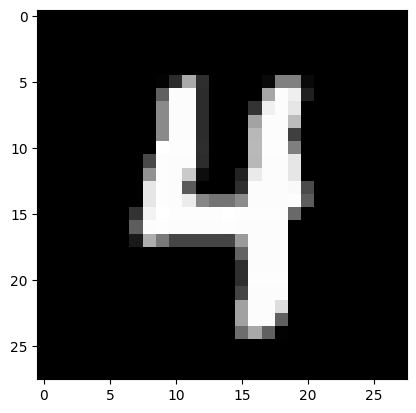

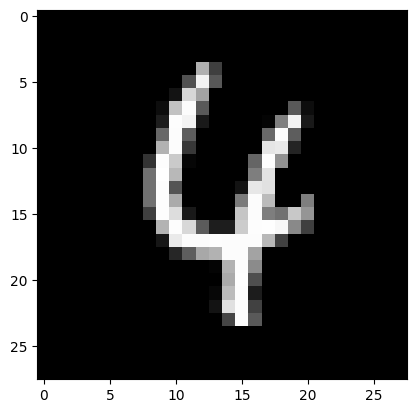

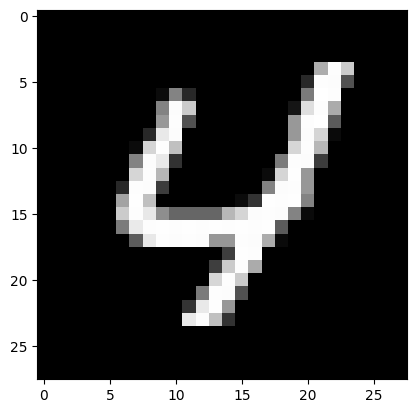

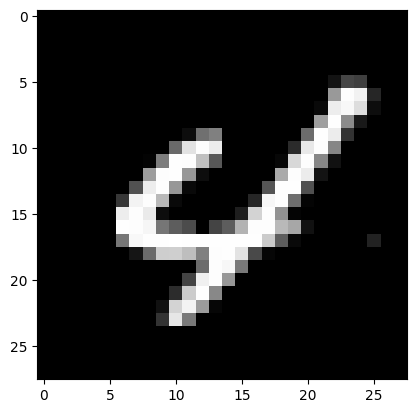

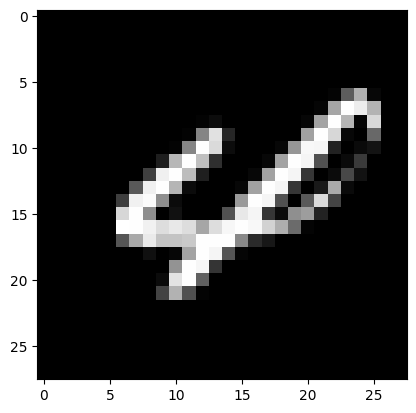

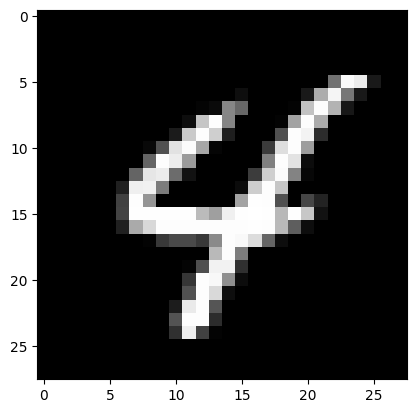

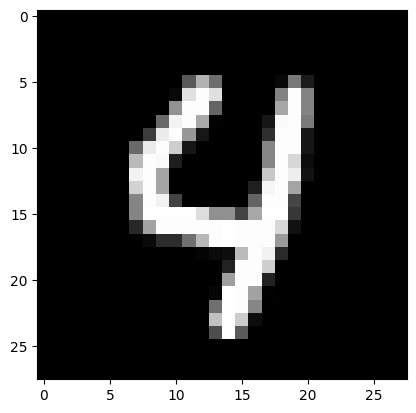

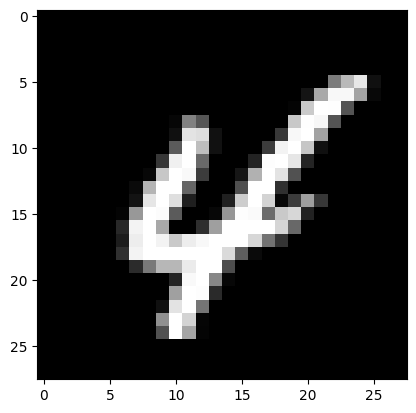

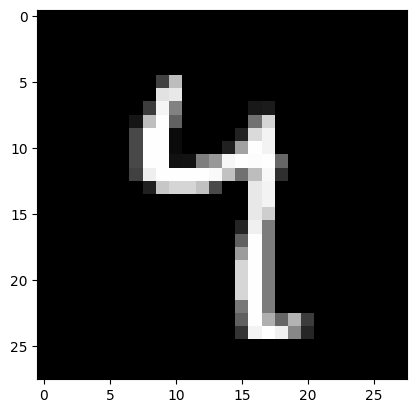

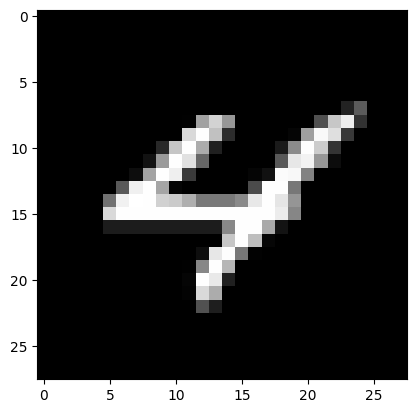

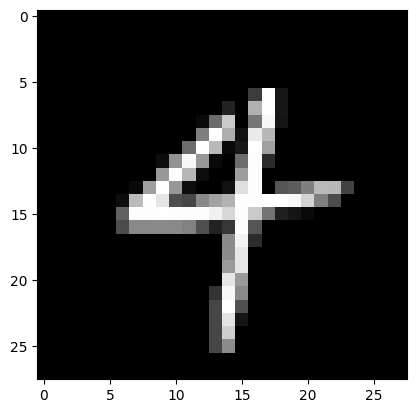

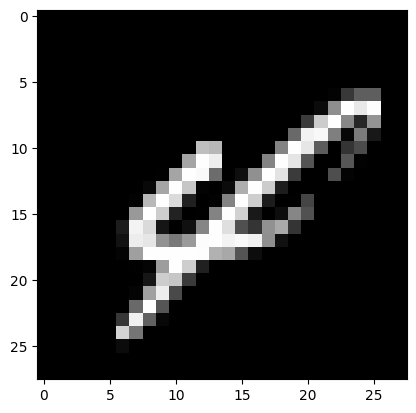

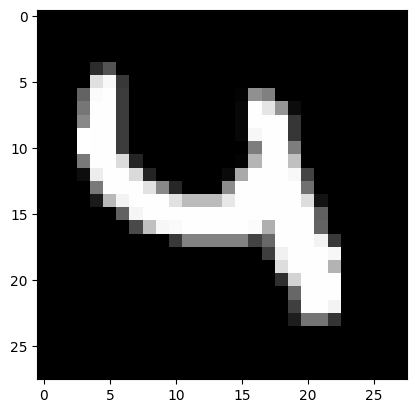

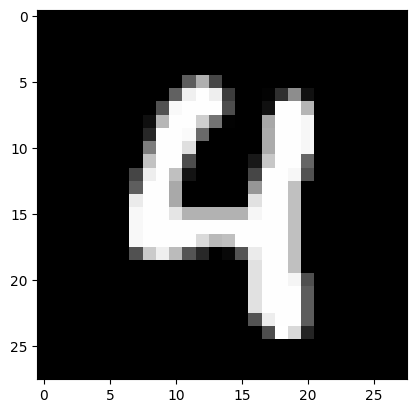

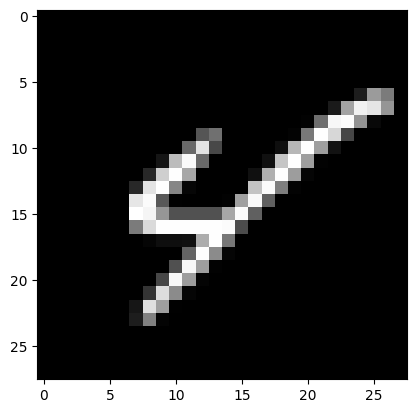

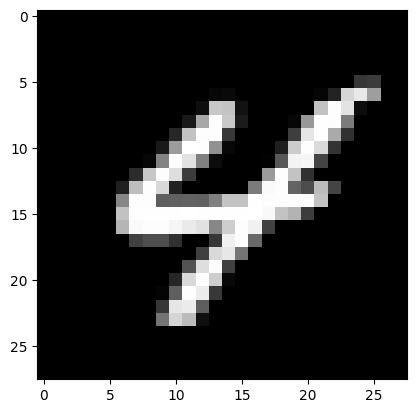

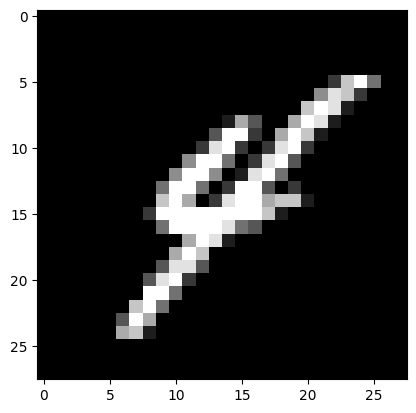

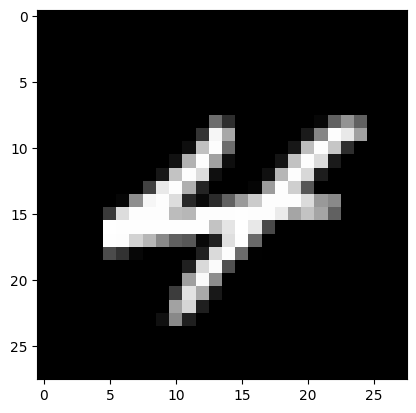

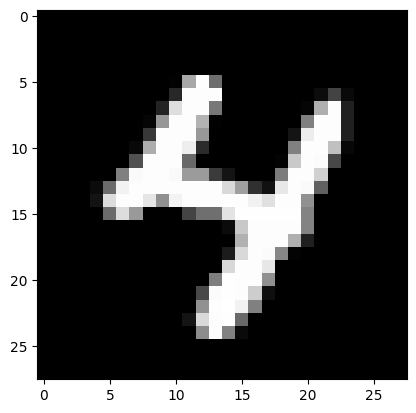

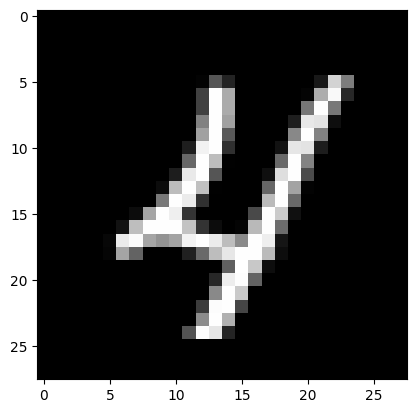

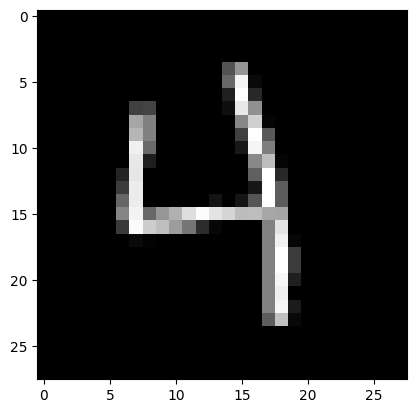

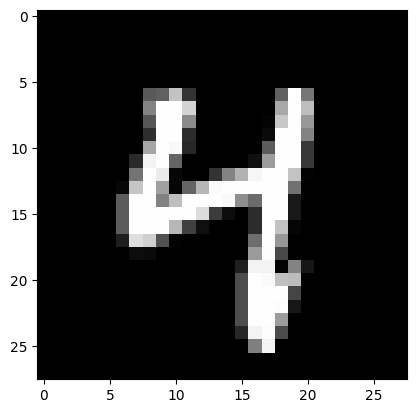

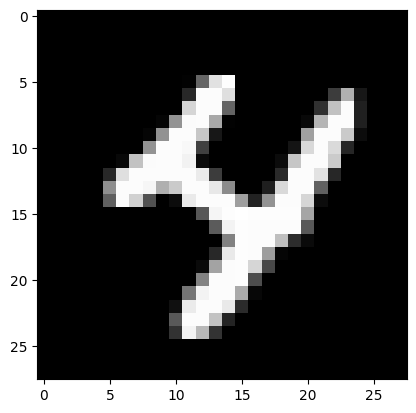

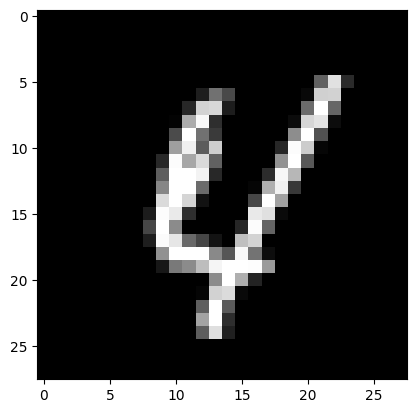

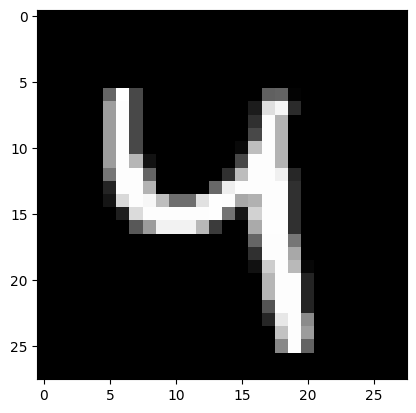

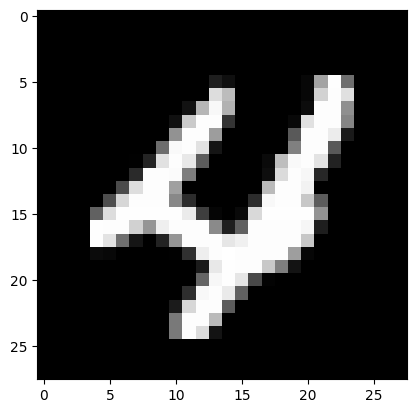

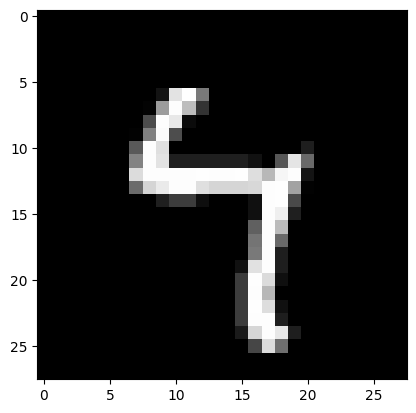

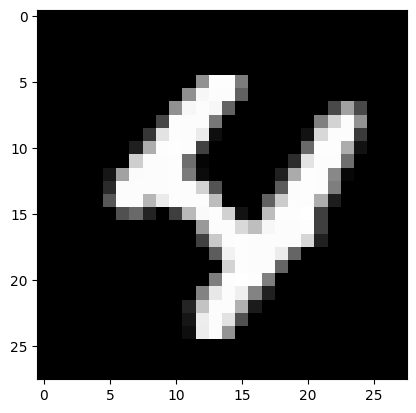

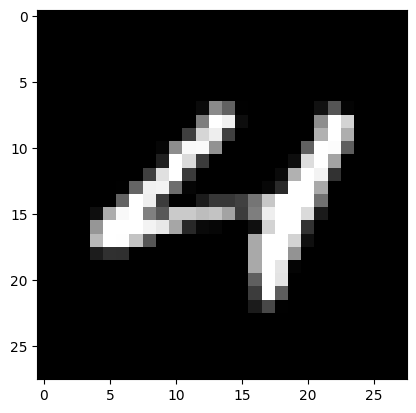

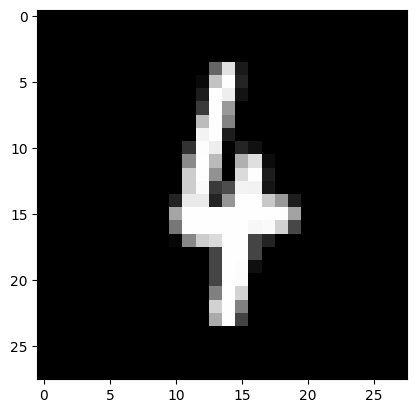

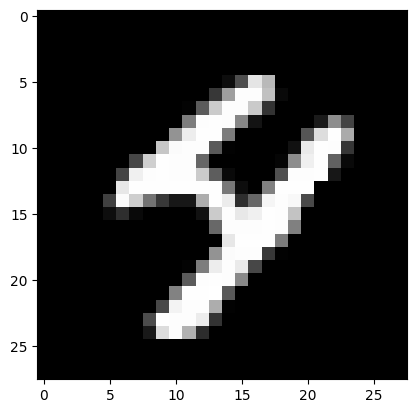

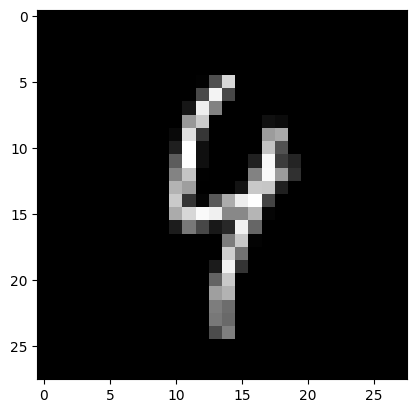

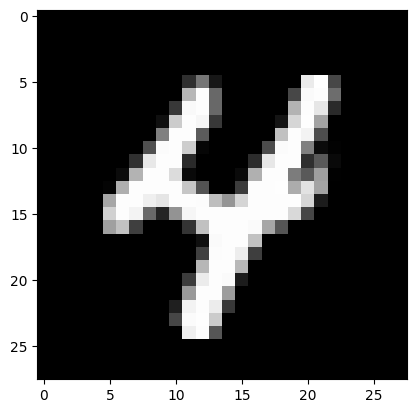

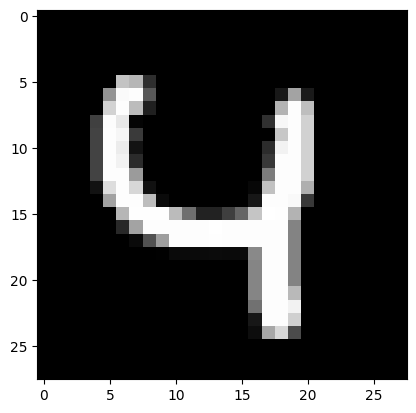

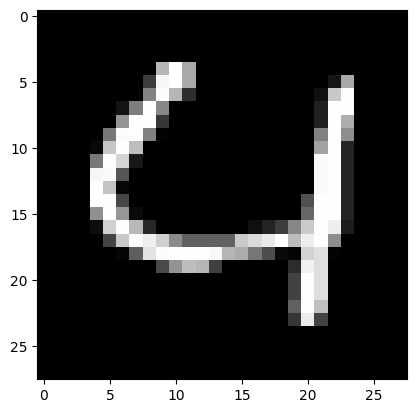

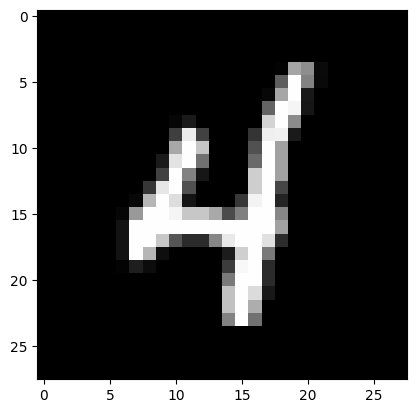

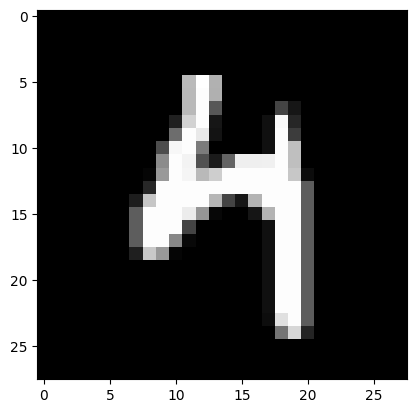

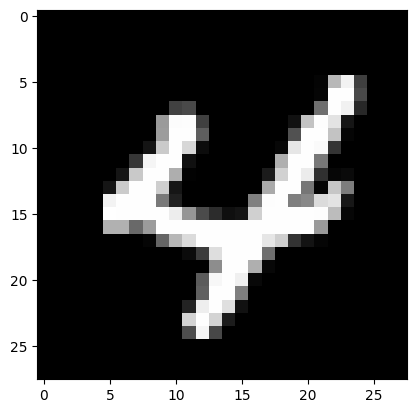

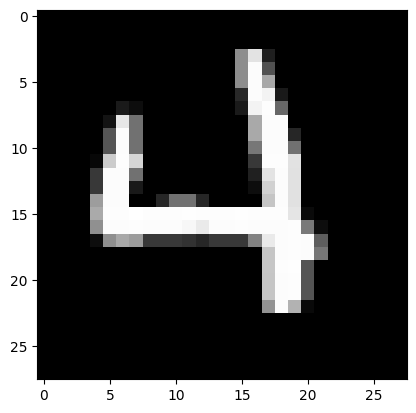

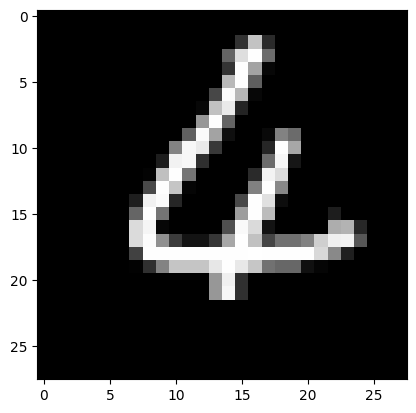

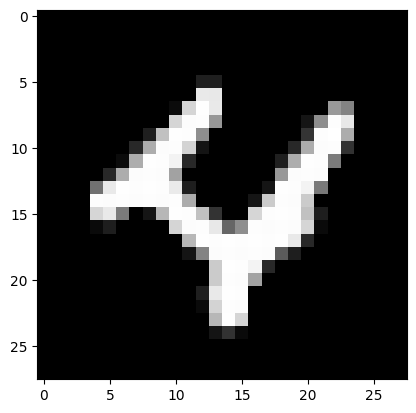

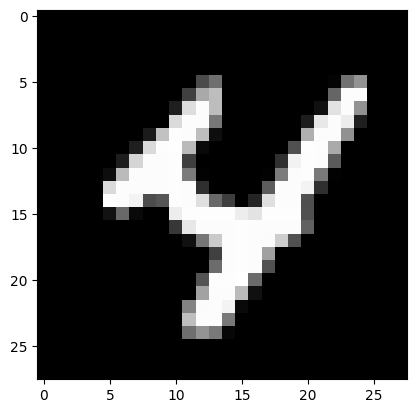

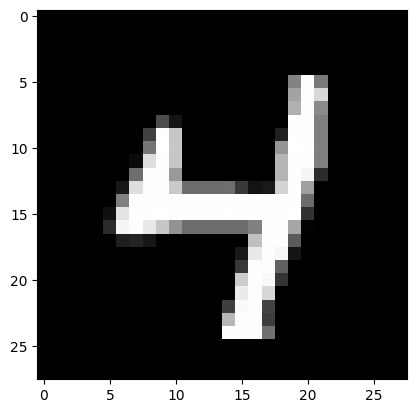

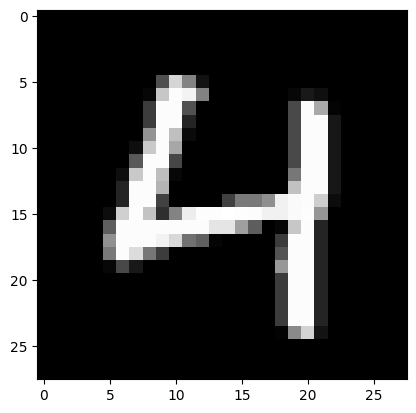

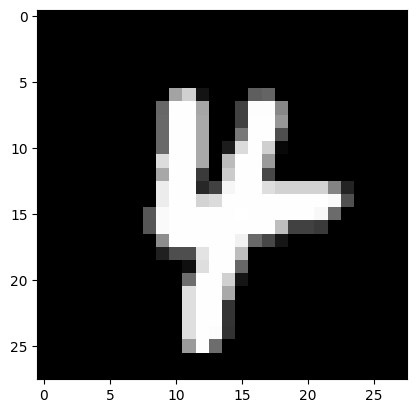

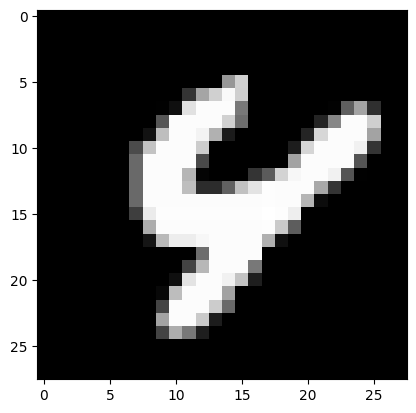

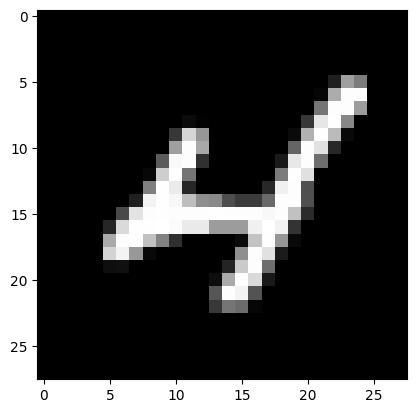

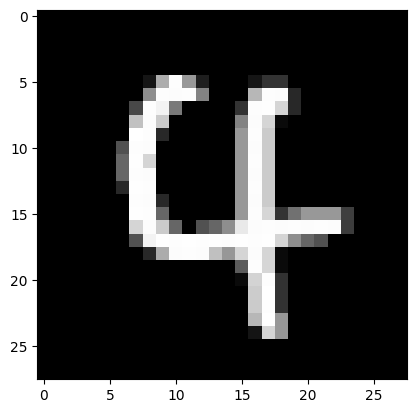

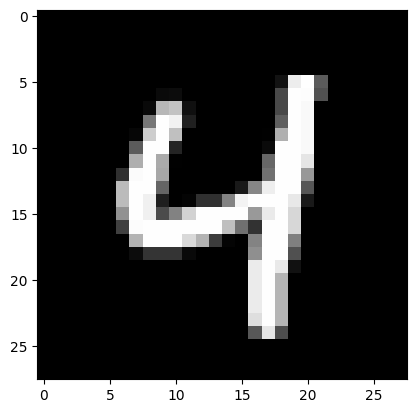

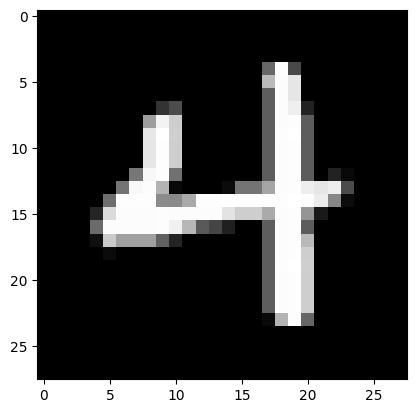

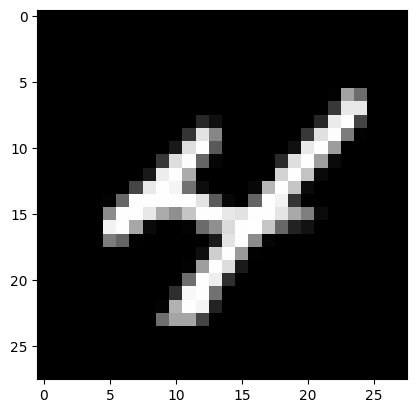

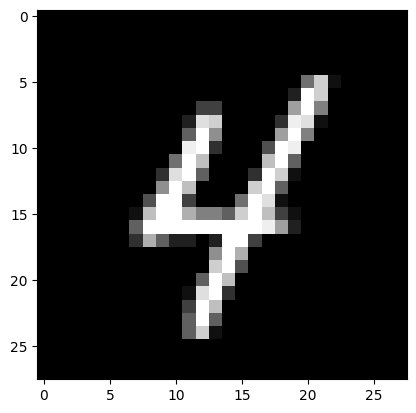

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

sixes = x_train[y_train == 4]

for i in range(100):
    plt.imshow(sixes[i], cmap='gray')
    plt.show()



In [2]:
import os
from tkinter import *
from tkinter import filedialog
from tkinter import messagebox

import numpy as np
import tensorflow as tf
from PIL import ImageDraw, Image
from more import crop_image
# model = tf.keras.models.load_model('minebak.h5')
model = tf.keras.models.load_model(r'mnist6.h5')
digits = []
num_row = 1

def predict_digit(img):
    img = img.reshape(1, 28, 28, 1)
    res = model.predict([img])[0]
    return np.argmax(res), max(res)

class App:

    def __init__(self):
        self.pen_color = "black"
        self.root = Tk()
        self.mode = 'draw'
        self.root.withdraw()  # 隐藏根窗口
        self.start_window = Toplevel(self.root)
        self.start_window.geometry("300x300")
        self.start_window.title("ve di")
        self.start_window.protocol("WM_DELETE_WINDOW", self.on_closing)
        # 整个背景
        # 创建 PhotoImage 对象
        bg_image = PhotoImage(file="./envdav/background.png")

        # 创建 Label 控件并设置背景图片
        bg_label = Label(self.start_window, image=bg_image)
        bg_label.place(x=0, y=0)

        # 保存对 PhotoImage 对象的引用，防止被垃圾回收
        bg_label.image = bg_image

        btn_canvas = Button(self.start_window, text="画布识别", command=self.show_canvas)
        btn_canvas.place(relx=0.5, rely=0.3, anchor=CENTER, width=80, height=40)

        btn_import = Button(self.start_window, text="导入图片识别", command=self.import_image_recognition)
        btn_import.place(relx=0.5, rely=0.6, anchor=CENTER, width=80, height=40)

        # 创建一个标签，显示输入框的描述
        self.label = Label(self.start_window, text="输入行数1~4")
        self.label.place(relx=0.2, rely=0.9, anchor=CENTER)

        # 创建一个输入框
        self.entry = Entry(self.start_window)
        self.entry.place(relx=0.5, rely=0.9, anchor=CENTER, width=80, height=20)

        # 创建一个确定按钮，绑定点击事件
        self.button = Button(self.start_window, text="确定", command=self.get_num_row)
        self.button.place(relx=0.75, rely=0.9, anchor=CENTER, width=40, height=20)

        if not os.path.exists('recognized'):
            os.mkdir('recognized')

        if not os.path.exists('./envdav/order.txt'):
            with open('./envdav/order.txt', 'w') as f:
                f.write('0')

        with open('./envdav/order.txt', 'r') as f:
            self.order = int(f.read())

    def get_num_row(self):
        global num_row  # 声明全局变量
        try:
            # 尝试将输入框的值转换为整数
            num_row = int(self.entry.get())
            # 判断输入的值是否在合理的范围内
            if num_row > 4 or num_row <= 0:
                # 如果不合理，弹出提示框
                messagebox.showerror("错误", "请输入0到4之间的整数")
            else:
                # 如果合理，弹出提示框
                messagebox.showinfo("成功", "你输入的行数是{}".format(num_row))
        except ValueError:
            # 如果转换失败，说明输入的不是数字，弹出提示框
            messagebox.showerror("错误", "请输入数字")

    def printf(self, string):
        self.printf_window = Toplevel(self.root)
        self.printf_window.title('识别结果')
        self.printf_window.geometry("250x100")
        label = Label(self.printf_window, text=string, anchor=CENTER, justify=CENTER)
        label.pack(expand=YES)
    # noinspection PyAttributeOutsideInit

    def on_closing(self):
        self.root.quit()

    def show_canvas(self):
        self.mode = 'draw'
        # 显示画布和其他按钮
        self.start_window.withdraw()
        self.canvas_window = Toplevel(self.root)
        self.canvas_window.protocol("WM_DELETE_WINDOW", self.on_closing)
        self.canvas_window.title("画布")

        self.canvas = Canvas(self.canvas_window, bg='white', width=1240, height=200*num_row)
        self.canvas.pack()
        for i in range(1, num_row):
            self.canvas.create_line(0, 200 * i, 1240, 200 * i, dash=(5, 5), tag='guide')
        self.image1 = Image.new("RGB", (1240, 200*num_row), 'white')
        self.draw = ImageDraw.Draw(self.image1)
        self.canvas.bind("<B1-Motion>", self.paint)

        button_frame = Frame(self.canvas_window)
        button_frame.pack(side=BOTTOM, anchor=CENTER)

        btn_recognize = Button(button_frame, text="识别", command=self.recognize)
        btn_recognize.pack(side=LEFT)

        btn_clear = Button(button_frame, text="清除", command=self.clear_all)
        btn_clear.pack(side=LEFT)

        btn_back = Button(button_frame, text="返回", command=self.back_to_start)
        btn_back.pack(side=LEFT)

        # 创建一个画笔颜色的变量
        self.pen_color = "black"

        # 创建一个画笔按钮
        btn_pen = Button(button_frame, text="画笔", command=self.use_pen)
        btn_pen.pack(side=RIGHT)

        # 创建一个橡皮按钮
        btn_eraser = Button(button_frame, text="橡皮", command=self.use_eraser)
        btn_eraser.pack(side=RIGHT)

    # 定义画笔按钮的回调函数
    def use_pen(self):
        self.pen_color = "black"

    # 定义橡皮按钮的回调函数
    def use_eraser(self):
        self.pen_color = "white"

    # 在绘图函数中使用画笔颜色的变量
    def paint(self, event):
        x1, y1 = (event.x - 8), (event.y - 8)
        x2, y2 = (event.x + 8), (event.y + 8)
        self.canvas.create_oval(x1, y1, x2, y2, fill=self.pen_color, outline=self.pen_color)
        self.draw.ellipse([x1, y1, x2, y2], fill=self.pen_color, outline=self.pen_color)

    def back_to_start(self):
        # 销毁画布识别窗口
        self.canvas_window.destroy()

        # 显示开始窗口
        self.start_window.deiconify()

    def import_image_recognition(self):
        self.mode = 'import'
        global digits
        imgpath = filedialog.askopenfilename(filetypes=[("Image Files", "*.png;*.jpg;*.jpeg")])
        if imgpath:
            # 打开图片文件并将其转换为 NumPy 数组
            img = Image.open(imgpath)
            img_array = np.array(img)
            self.image1 = img_array
            # 调用 recognize 方法处理图片
            self.recognize()
        digits.clear()

    def recognize(self):
        img = self.image1
        if hasattr(self, 'printf_window'):
            self.printf_window.destroy()
        if self.mode == 'draw':
            self.canvas.delete('guide')
            img = self.image1
            for i in range(1, num_row):
                self.canvas.create_line(0, 200 * i, 1240, 200 * i, dash=(5, 5), tag='guide')
        cropped_images = crop_image(img,num_row)
        global digits
        if len(cropped_images) == 0:
            self.printf('没有识别到数字')
        else:
            for img in cropped_images:
                digit, prediction = predict_digit(img)
                digits.append(digit)
                # print(f'预测结果: {digit}, 置信度: {prediction * 100:.2f}%')
                # filename = f'recognized/{digit}_{self.order}.png'
                # print(f'保存图片到: {filename}')
                # pil_img = Image.fromarray(img)
                # pil_img.save(filename)

                # with open('./envdav/order.txt', 'w') as f:
                #     f.write(str(self.order + 1))

                # self.order += 1
            strdigits = [str(x) for x in digits]
            strdigits = ''.join(strdigits)
            self.printf(f'识别到的数字是:{strdigits}')
            digits.clear()

    def clear_all(self):
        if hasattr(self, 'printf_window'):
            self.printf_window.destroy()
        global digits
        self.canvas.delete("all")
        self.draw.rectangle([0, 0, 1240, 200*num_row], fill='white')
        digits.clear()
        for i in range(1, num_row):
            self.canvas.create_line(0, 200 * i, 1240, 200 * i, dash=(5, 5), tag='guide')


app = App()
app.root.mainloop()

ModuleNotFoundError: No module named 'more'